In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## 2_패딩과_스트라이드.ipynb - [ 2. 스트라이드란 ] - 스트라이드 적용하기

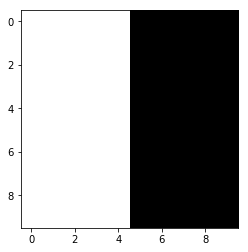

In [2]:
image = np.zeros((10, 10),dtype=np.uint8)
image[:,:5] = 10

plt.imshow(image,cmap='gray')
plt.show()

Before Feature Map size : (10, 10)
After Padding Feature Map size : (12, 12)
After Feature Map size : (5, 5)
[[-30.   0.  30.   0.   0.]
 [-40.   0.  40.   0.   0.]
 [-40.   0.  40.   0.   0.]
 [-40.   0.  40.   0.   0.]
 [-40.   0.  40.   0.   0.]]


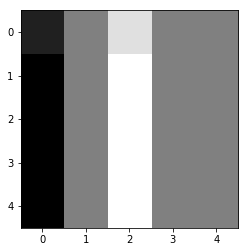

In [3]:
stride = 2
s = stride

print("Before Feature Map size :",image.shape)                  # (10, 10)
image_with_pad = np.pad(image,[[1,1],[1,1]],mode='constant')
print("After Padding Feature Map size :",image_with_pad.shape)  # (12, 12)

# sobel Filter를 이용
v_sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]]) 

# 합성곱 연산 적용
# shape = (n - k + 2p)/s올림 + 1 = (10 - 3 + 2p)/2 + 1 =  (10 - 3 + 2)/2 + 1 = 5
# p = (k-1)/2 = 1
result = np.zeros((5, 5)) # stride를 적용하면 크기가 반으로 줄어듬
for i in range(5):
    # stride의 간격으로 값을 가져옴
    for j in range(5):
        patch = image_with_pad[i*s: i*s+3, j*s: j*s+3]
        value = np.sum( patch * v_sobel)
        result[i, j] = value

print("After Feature Map size :",result.shape)
print(result)
plt.imshow(result, cmap='gray')
plt.show()

## 3_고차원에서의_합성곱_연산.ipynb - [ 1. 3, 4차원 데이터의 합성곱 연산 ] - 2. 복수개의 필터로 3차원 데이터 합성곱 진행하기 - (1) Filter 구성하기

In [4]:
in0 = np.array([
    [1,4,2,0],
    [2,3,1,0],
    [3,1,2,3],
    [4,3,2,1]
])
in1 = np.array([
    [1,7,2,1],
    [3,2,1,9],
    [0,1,5,1],
    [4,6,2,4]
])
in2 = np.array([
    [1,5,2,1],
    [3,2,1,9],
    [0,1,3,1],
    [4,6,2,7]
])
inputs = np.stack([in0, in1, in2], axis=-1)
print("입력값의 형태 (H, W, C) :({},{},{})".format(*inputs.shape))

입력값의 형태 (H, W, C) :(4,4,3)


In [5]:
filter_1 = np.array([  # (3,3,3) 안 3개, 밖 3개,  밖 3개  
    [[2,0,1],[0,1,2],[1,0,2]],
    [[0,1,3],[2,1,3],[4,1,2]],
    [[3,2,1],[2,2,3],[0,0,1]]])
filter_2 = np.array([
    [[4,0,1],[0,0,4],[0,3,2]],
    [[6,1,2],[3,5,1],[2,3,2]],
    [[1,4,1],[1,3,1],[2,1,0]]])

# filter 의 최종 shape 는 (N, H, W, C) 가 되어야 합니다.
filters = np.stack([filter_1, filter_2], axis=0)
print("Filter의 형태 (inputChannel, H, W, outputChannel) : ({},{},{},{})".format(*filters.shape))  

Filter의 형태 (inputChannel, H, W, outputChannel) : (2,3,3,3)


In [6]:
filters[:,0,:,:]  # 흠.. channel이 왜 axis=1로 되있을까..

array([[[2, 0, 1],
        [0, 1, 2],
        [1, 0, 2]],

       [[4, 0, 1],
        [0, 0, 4],
        [0, 3, 2]]])

In [7]:
outputs = np.zeros((2,2)) # (4 - 3 + 0)/1 + 1 = 2
for i in range(2):         # output Img height
    for j in range(2):     # output Img width
         for k in range(3): # filter
            patch = inputs[i:i+3, j:j+3, k]
            filter = filters[:,k,:,:]
            result = np.sum(patch * filter)
            outputs[i, j] = result
outputs

array([[65., 87.],
       [59., 75.]])